## BFS (Breadth-First Search)

**Definition :** BFS is an algorithm for traversing a tree or graph horizontally. 

In [1]:
my_dict = {
    "a": ["b", "c"],
    "b": ["d", "e", "f"],
    "c": ["g"],
    "f": ["h"],
    "g": ["i"]
}

In the above code, I have defined a tree. Its representation is shown in the image below.

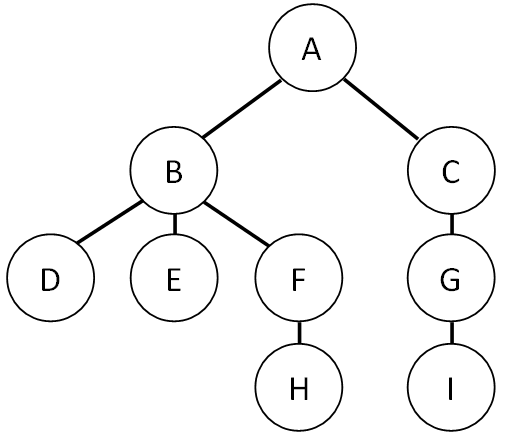

#### **Implementation**

Here, we start from a node (often the root of the tree). We then place this node in the list of nodes to visit (called the queue). Now, as long as the list of nodes to visit is not empty, the algorithm will continue and each time a node is visited, its children will be added to the list of nodes to visit.

In [2]:
def bfs(graph, start_node):
    visited = []  # List to store visited nodes
    queue = [start_node]  # Queue for BFS
    visited.append(start_node)

    if start_node not in graph:
        return []

    while queue:
        node = queue.pop(0)  # Dequeue the first node

        if node in graph:
            for neighbor in graph[node]:  # Iterate through neighbors of the current node
                if neighbor not in visited:
                    visited.append(neighbor)
                    queue.append(neighbor)  # Enqueue the neighbors
    return visited

#### **Testing**

We can check that the output of our example will be the letters a to i in alphabetical order.

In [3]:
bfs(my_dict, 'a')

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

#### **Real-life problem**

Among other things, this algorithm can be used to find the shortest path between two nodes.

Let's imagine we have a map of a city and we can only go from one point to another by certain paths. In this case, we can use the BFS to go through all the paths to find the shortest one.

In [4]:
import collections

def find_shortest_route(city_map, start_location, destination):
    if start_location not in city_map or destination not in city_map:
        print(f"Error: Start '{start_location}' or destination '{destination}' not found in the map.")
        return None

    # Queue stores tuples: (current_location, path_to_current_location)
    queue = collections.deque([(start_location, [start_location])])

    visited = {start_location}

    print(f"Starting route search from '{start_location}' to '{destination}'...")

    while queue:
        current_location, path = queue.popleft()

        print(f"  Exploring from: {current_location} (Path so far: {path})")

        if current_location == destination:
            print(f"  Destination '{destination}' reached!")
            return path

        # Explore neighbors of the current location
        for neighbor in city_map.get(current_location, []):
            if neighbor not in visited:
                visited.add(neighbor)
                new_path = path + [neighbor]
                queue.append((neighbor, new_path))
                print(f"    Adding neighbor: {neighbor} (New path: {new_path})")

    print(f"No route found from '{start_location}' to '{destination}'.")
    return None

In [5]:
# Representing a simplified city map
city_map = {
    'Home': ['Park', 'Library'],
    'Park': ['Home', 'Coffee Shop', 'Mall'],
    'Library': ['Home', 'School', 'Bookstore'],
    'Coffee Shop': ['Park', 'Mall'],
    'School': ['Library', 'Museum'],
    'Mall': ['Park', 'Coffee Shop', 'Cinema'],
    'Bookstore': ['Library'],
    'Museum': ['School'],
    'Cinema': ['Mall']
}

In [6]:
print("--- Scenario 1: Shortest route from Home to Cinema ---")
route1 = find_shortest_route(city_map, 'Home', 'Cinema')
if route1:
    print(f"\nShortest route from Home to Cinema: {' -> '.join(route1)}")
else:
    print("\nCould not find a route.")

--- Scenario 1: Shortest route from Home to Cinema ---
Starting route search from 'Home' to 'Cinema'...
  Exploring from: Home (Path so far: ['Home'])
    Adding neighbor: Park (New path: ['Home', 'Park'])
    Adding neighbor: Library (New path: ['Home', 'Library'])
  Exploring from: Park (Path so far: ['Home', 'Park'])
    Adding neighbor: Coffee Shop (New path: ['Home', 'Park', 'Coffee Shop'])
    Adding neighbor: Mall (New path: ['Home', 'Park', 'Mall'])
  Exploring from: Library (Path so far: ['Home', 'Library'])
    Adding neighbor: School (New path: ['Home', 'Library', 'School'])
    Adding neighbor: Bookstore (New path: ['Home', 'Library', 'Bookstore'])
  Exploring from: Coffee Shop (Path so far: ['Home', 'Park', 'Coffee Shop'])
  Exploring from: Mall (Path so far: ['Home', 'Park', 'Mall'])
    Adding neighbor: Cinema (New path: ['Home', 'Park', 'Mall', 'Cinema'])
  Exploring from: School (Path so far: ['Home', 'Library', 'School'])
    Adding neighbor: Museum (New path: ['Home'